In [2]:
%pip install pydub

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
from pydub import AudioSegment
import torch

from torchaudio.transforms import MelSpectrogram
import os
import torchaudio
from torchaudio.transforms import MelSpectrogram

import torch
import numpy as np
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [4]:
# Cargar el archivo CSV
data = pd.read_csv('datos/train.csv')

# Mostrar las primeras filas
print(data.head())
shape = data.shape
print(shape)

              filename     start       end        class
0  nips4b_train001.wav  2.975057  3.172426  Petpet_song
1  nips4b_train001.wav  1.967891  2.054966  Sylcan_song
2  nips4b_train001.wav  0.856236  0.937506  Sylcan_song
3  nips4b_train001.wav  1.541224  1.674739  Sylcan_song
4  nips4b_train001.wav  1.843084  1.973696  Sylcan_song
(4588, 4)


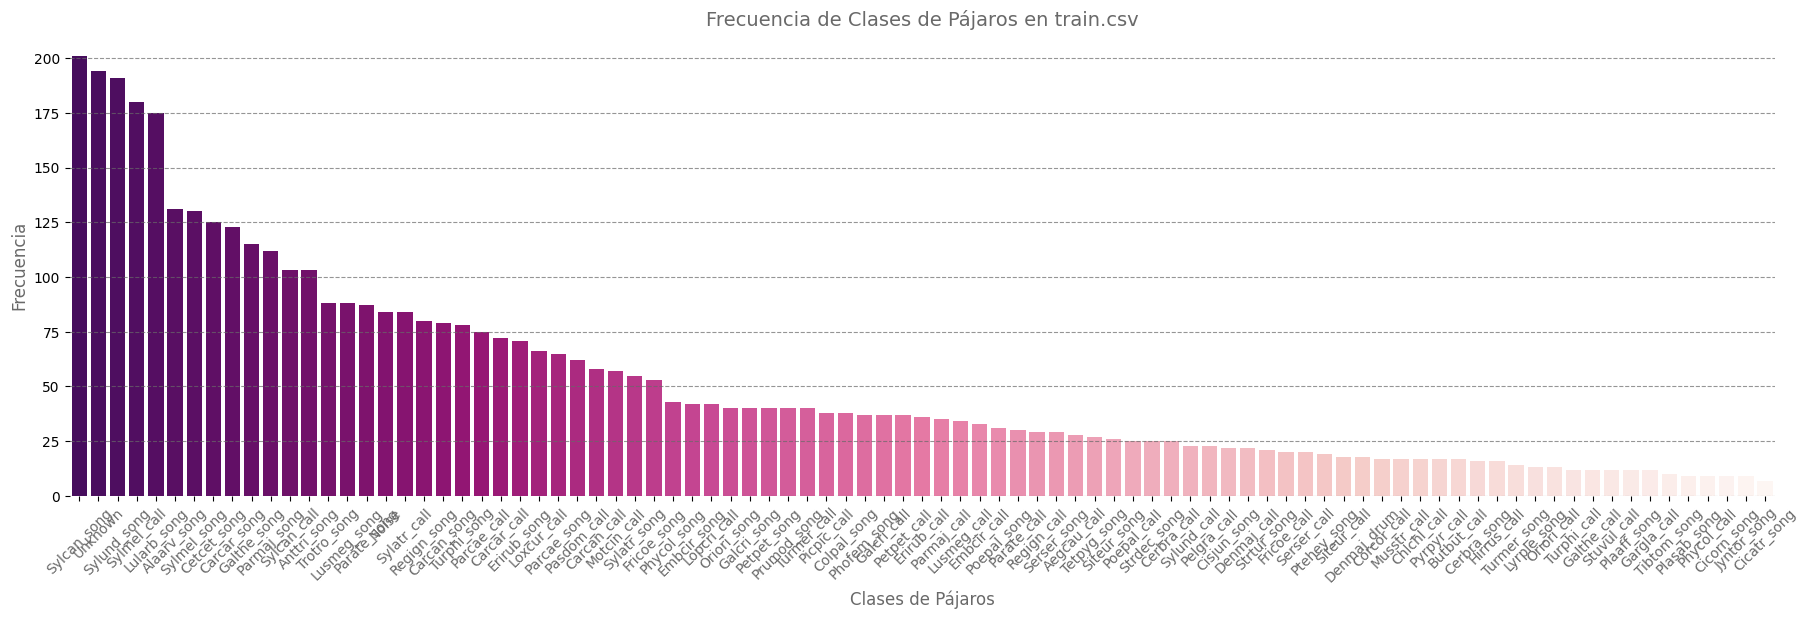

In [5]:
# Contar la frecuencia de cada clase
class_counts = data['class'].value_counts()
# Establecer un estilo más estilizado

# Definir una paleta de colores degradados de rosas
colors = sns.color_palette("RdPu", len(class_counts))[::-1]

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(22, 6))  # Ajustar el tamaño del gráfico
ax = sns.barplot(x=class_counts.index, y=class_counts, palette=colors)
plt.xlabel('Clases de Pájaros', fontsize=12, color='dimgray')  # Tamaño y color de etiquetas
plt.ylabel('Frecuencia', fontsize=12, color='dimgray')
plt.title('Frecuencia de Clases de Pájaros en train.csv', fontsize=14, color='dimgray')  # Tamaño y color del título
plt.xticks(rotation=45, fontsize=10, color='dimgray')  # Tamaño y color de las etiquetas en el eje x

# Configurar el esquema de colores del fondo
  # Fondo gris oscuro
ax.spines['bottom'].set_color('dimgray')  # Color del borde inferior
ax.spines['top'].set_color('dimgray')  # Color del borde superior
ax.spines['left'].set_color('dimgray')  # Color del borde izquierdo
ax.spines['right'].set_color('dimgray')  # Color del borde derecho
ax.xaxis.label.set_color('dimgray')  # Color de la etiqueta del eje x
ax.yaxis.label.set_color('dimgray')  # Color de la etiqueta del eje y

# Personalizar las líneas de la cuadrícula
sns.despine(left=True, bottom=True)
plt.grid(axis='y', color='dimgray', linestyle='--', alpha=0.7)

plt.show()


In [6]:
def recortar_audio(input_path, output_path, start_time, end_time):
    # Cargar el archivo de audio
    audio = AudioSegment.from_file(input_path)

    # Calcular los tiempos en milisegundos
    start_time_ms = int(start_time * 1000)
    end_time_ms = int(end_time * 1000)

    # Recortar el audio
    audio_recortado = audio[start_time_ms:end_time_ms]

    # Guardar el audio recortado en el archivo de salida
    audio_recortado.export(output_path, format="wav")

# Leer el archivo CSV

data = pd.read_csv('datos/train.csv')
recortes=[]
# Iterar sobre las filas del DataFrame y recortar los audios
for index, row in data.iterrows():
    filename = row['filename']
    start_time = row['start']
    end_time = row['end']
    class_name = row['class']

    input_path = f"datos/train/{filename}"
    filename=filename[:-4]
    numero=1
    if filename in recortes:
        i = 2  # Inicializa un contador para agregar números al final del nombre de archivo
        while True:
            new_filename = f"{filename}{i}"  # Agrega el contador
            if new_filename not in recortes:
                break  # Sal del bucle si se encuentra un nombre de archivo único
            i += 1

        filename = new_filename

        filename = new_filename
    output_path = f"recortes/{filename}_{class_name}.wav"

    recortar_audio(input_path, output_path, start_time, end_time)
    recortes.append(filename)

In [7]:
from pydub import AudioSegment
import pandas as pd

def recortar_audio(input_path, output_path, start_time, end_time, class_name, repetition):
    # Cargar el archivo de audio
    audio = AudioSegment.from_file(input_path)

    # Calcular los tiempos en milisegundos
    start_time_ms = int(start_time * 1000)
    end_time_ms = int(end_time * 1000)

    # Recortar el audio
    audio_recortado = audio[start_time_ms:end_time_ms]

    # Guardar el audio recortado en el archivo de salida
    audio_recortado.export(output_path, format="wav")

# Leer el archivo CSV
data = pd.read_csv('datos/train.csv')
recortes = {}
nombres=[]

# Iterar sobre las filas del DataFrame y recortar los audios
for index, row in data.iterrows():
    filename = row['filename']
    start_time = row['start']
    end_time = row['end']
    class_name = row['class']

    input_path = f"datos/train/{filename}"

    if class_name in recortes:
        recortes[class_name] += 1
    else:
        recortes[class_name] = 1

    repetition = recortes[class_name]
    filename = filename[:-4]
    output_path = f"recortes/{filename}_{repetition}_{class_name}.wav"
    nombre=f'{filename}_{repetition}_{class_name}.wav'
    nombres.append(nombre)

    recortar_audio(input_path, output_path, start_time, end_time, class_name, repetition)


In [8]:
len(nombres)

4588

Convertir los audios

creación nuevo dataframe

In [9]:

data1= pd.DataFrame({'class': data['class'], 'nombres': nombres})
display(data1)

,class,nombres
0,Petpet_song,nips4b_train001_1_Petpet_song.wav
1,Sylcan_song,nips4b_train001_1_Sylcan_song.wav
2,Sylcan_song,nips4b_train001_2_Sylcan_song.wav
3,Sylcan_song,nips4b_train001_3_Sylcan_song.wav
4,Sylcan_song,nips4b_train001_4_Sylcan_song.wav
...,...,...
4583,Poepal_call,nips4b_train525_22_Poepal_call.wav
4584,Poepal_call,nips4b_train525_23_Poepal_call.wav
4585,Poepal_call,nips4b_train525_24_Poepal_call.wav
4586,Unknown,nips4b_train525_194_Unknown.wav


In [10]:
# Ruta a la carpeta de recortes
carpeta_recortes = 'recortes'
import torchaudio

# Cargar el dataframe con las asignaciones de audios a razas
df = data1

# Directorio de salida para guardar los espectrogramas
directorio_espectrogramas = 'espectrogramas'

# Crear el directorio de espectrogramas si no existe
if not os.path.exists(directorio_espectrogramas):
    os.makedirs(directorio_espectrogramas)

# Transformación para calcular el espectrograma
transformacion = MelSpectrogram()
nombres2=[]
# Iterar a través de los archivos de audio y guardar los espectrogramas
for indice, fila in df.iterrows():
    nombre_audio = fila['nombres']
    ruta_audio = os.path.join(carpeta_recortes, nombre_audio)

    waveform, sample_rate = torchaudio.load(ruta_audio)
    espectrograma = transformacion(waveform)

    # Obtener el nombre base del archivo de audio (sin extensión)
    nombre_base = os.path.splitext(os.path.basename(nombre_audio))[0]

    # Generar el nombre del espectrograma con el nombre base del archivo de audio
    nombre_espectrograma = f'espectrograma_{nombre_base}.pt'
    nombres2.append(f'espectrograma_{nombre_base}.pt')
    ruta_espectrograma = os.path.join(directorio_espectrogramas, nombre_espectrograma)
    torch.save(espectrograma, ruta_espectrograma)

# Ahora tienes tus espectrogramas guardados en el directorio_espectrogramas

In [11]:
import os
import torchaudio
import torch
from torchaudio.transforms import MelSpectrogram
import torch.nn.functional as F

# Ruta a la carpeta de recortes
carpeta_recortes = 'recortes'

# Cargar el dataframe con las asignaciones de audios a razas
df = data1

# Transformación para calcular el espectrograma
transformacion = MelSpectrogram()

# Lista para almacenar los espectrogramas
espectrogramas = []

# Determina la longitud máxima de espectrograma
max_length = 0

# Iterar a través de los archivos de audio
for indice, fila in df.iterrows():
    nombre_audio = fila['nombres']
    ruta_audio = os.path.join(carpeta_recortes, nombre_audio)

    waveform, sample_rate = torchaudio.load(ruta_audio)
    espectrograma = transformacion(waveform)

    # Actualiza la longitud máxima si es necesario
    max_length = max(max_length, espectrograma.shape[2])

    espectrogramas.append(espectrograma)

# Iterar nuevamente para aplicar padding
padded_espectrogramas = []

for espectrograma in espectrogramas:
    # Calcula cuánto padding se necesita
    padding_needed = max_length - espectrograma.shape[2]

    # Aplica el padding al espectrograma
    padded_espectrograma = F.pad(espectrograma, (0, padding_needed))

    padded_espectrogramas.append(padded_espectrograma)

# Ahora tienes tus espectrogramas con el mismo tamaño en la lista 'padded_espectrogramas'


In [29]:
# Verifica las dimensiones de los espectrogramas
for i, espectrograma in enumerate(padded_espectrogramas):
    if i == 0:
        # La primera vez, guarda las dimensiones del primer espectrograma
        expected_shape = espectrograma.shape
    else:
        # Compara las dimensiones del espectrograma actual con las esperadas
        if espectrograma.shape != expected_shape:
            print(f"Los espectrogramas no tienen el mismo tamaño. El espectrograma {i} tiene dimensiones diferentes.")
            break
else:
    # Si el loop for se ejecuta completamente sin encontrar diferencias, significa que todos los espectrogramas tienen el mismo tamaño.
    print("Todos los espectrogramas tienen el mismo tamaño.")

Todos los espectrogramas tienen el mismo tamaño.


In [13]:
data2= pd.DataFrame({'class': data['class'], 'espectrogramas': espectrogramas})

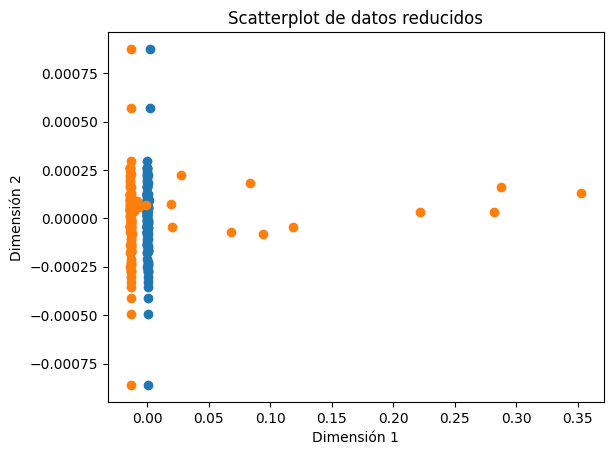

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(espectrogramas[0].reshape(-1, espectrogramas[0].shape[-1]))
data_3d = pca.fit_transform(espectrogramas[2].reshape(-1, espectrogramas[2].shape[-1]))

# Crear un scatterplot
plt.scatter(data_2d[:, 0], data_2d[:, 1])

# Crear un scatterplot
plt.scatter(data_3d[:, 0], data_2d[:, 1])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Scatterplot de datos reducidos')
plt.show()


In [18]:
print(padded_espectrogramas[0].shape)
print(padded_espectrogramas[1].shape)
print(padded_espectrogramas[2].shape)

torch.Size([1, 128, 1104])
torch.Size([1, 128, 1104])
torch.Size([1, 128, 1104])


In [34]:
import torch
from torch.utils.data import Dataset

class EspectrogramaDataset(Dataset):
    def __init__(self, padded_espectrogramas, etiquetas):
        self.padded_espectrogramas = padded_espectrogramas  # Lista de espectrogramas
        self.etiquetas = etiquetas  # Lista de etiquetas

    def __len__(self):
        return len(self.padded_espectrogramas)

    def __getitem__(self, idx):
        espectrograma = self.padded_espectrogramas[idx]
        etiqueta = self.etiquetas[idx]
        return espectrograma, etiqueta



In [45]:
from sklearn.preprocessing import LabelEncoder
import torch

# Obtén las etiquetas desde tu DataFrame
etiquetas = data1['class']

# Inicializa el codificador de etiquetas
label_encoder = LabelEncoder()

# Ajusta el codificador a tus etiquetas y transforma las etiquetas en valores numéricos
etiquetas_codificadas = label_encoder.fit_transform(etiquetas)

# Convierte las etiquetas codificadas en tensores de PyTorch
etiquetas_tensores = [torch.tensor(etiqueta) for etiqueta in etiquetas_codificadas]

# Ahora, 'etiquetas_tensores' es una lista que contiene cada etiqueta convertida en un tensor




In [43]:
print(data1['class'])

0       Petpet_song
1       Sylcan_song
2       Sylcan_song
3       Sylcan_song
4       Sylcan_song
           ...     
4583    Poepal_call
4584    Poepal_call
4585    Poepal_call
4586        Unknown
4587    Poepal_call
Name: class, Length: 4588, dtype: object


In [46]:
dataset = EspectrogramaDataset(padded_espectrogramas, etiquetas_tensores)

In [47]:
from torch.utils.data import DataLoader

batch_size = 64  # Tamaño del lote (puedes ajustarlo según tus necesidades)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define tu modelo de aprendizaje profundo
import torch.nn as nn

class MiModelo(nn.Module):
    def __init__(self, num_clases):
        super(MiModelo, self).__init__()
        # Define la arquitectura de tu modelo aquí
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_clases)  # num_clases es el número de clases de tu problema

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# Instancia de tu modelo
modelo = MiModelo(89)

# Función de pérdida y optimizador
criterio = nn.CrossEntropyLoss()
optimizador = optim.Adam(modelo.parameters(), lr=0.001)

# Número de épocas de entrenamiento
num_epocas = 10

In [49]:
import torch
import torch.nn.functional as F

# Define la longitud máxima deseada para los espectrogramas
max_length = 128  # Ajusta este valor según tus necesidades

# Lista para almacenar los espectrogramas con padding
padded2_espectrogramas = []

# Itera a través de los espectrogramas originales
for espectrograma in padded_espectrogramas:
    # Calcula cuánto padding se necesita
    padding_needed = max_length - espectrograma.shape[2]

    # Aplica el padding al espectrograma
    padded2_espectrograma = F.pad(espectrograma, (0, padding_needed))

    padded2_espectrogramas.append(padded_espectrograma)

# Ahora todos los espectrogramas en 'padded_espectrogramas' tienen la misma longitud.


In [ ]:
# Convierte los espectrogramas con el nuevo padding en tensores de PyTorch
espectrogramas_tensores = [torch.tensor(espectrograma) for espectrograma in padded2_espectrogramas]

# Verifica las dimensiones de los espectrogramas después del nuevo padding
for espectrograma in espectrogramas_tensores:
    print(espectrograma.shape)

# Crea un DataLoader para el nuevo conjunto de datos
nuevo_dataset = EspectrogramaDataset(espectrogramas_tensores, etiquetas_tensores)
nuevo_dataloader = DataLoader(nuevo_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Define una función de entrenamiento para tu modelo
def entrenar_modelo(modelo, dataloader, criterio, optimizador, num_epocas):
    modelo.train()  # Pone el modelo en modo de entrenamiento

    for epoca in range(num_epocas):
        running_loss = 0.0

        for i, data in enumerate(dataloader, 0):
            inputs, etiquetas = data

            optimizador.zero_grad()  # Inicializa los gradientes

            # Adelante
            salidas = modelo(inputs)
            loss = criterio(salidas, etiquetas)
            loss.backward()  # Retropropagación
            optimizador.step()  # Actualiza los pesos

            running_loss += loss.item()

            if i % 10 == 9:  # Imprime cada 10 lotes
                print(f'Época {epoca + 1}, Lote {i + 1}, Pérdida: {running_loss / 10:.3f}')
                running_loss = 0.0

    print('Entrenamiento completado.')

# Entrena tu modelo con el nuevo DataLoader
entrenar_modelo(modelo, nuevo_dataloader, criterio, optimizador, num_epocas)

# Guarda el modelo entrenado
torch.save(modelo.state_dict(), 'modelo_entrenado.pth')

# Carga el modelo entrenado (si es necesario)
modelo_cargado = MiModelo(89)  # Asegúrate de ajustar el número de clases
modelo_cargado.load_state_dict(torch.load('modelo_entrenado.pth'))

# Evalúa el modelo cargado
modelo_cargado.eval()  # Pone el modelo en modo de evaluación

# Define una función para predecir etiquetas
def predecir_etiquetas(modelo, dataloader):
    etiquetas_predichas = []
    with torch.no_grad():
        for data in dataloader:
            inputs, _ = data
            salidas = modelo(inputs)
            _, predicted = torch.max(F.softmax(salidas, dim=1), 1)
            etiquetas_predichas.extend(predicted)
    return etiquetas_predichas

# Carga un conjunto de datos de prueba (reemplaza con tus datos de prueba)
# Asegúrate de que los espectrogramas de prueba tengan el mismo formato que los de entrenamiento
# y que el DataLoader esté configurado adecuadamente
